In [2]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [3]:
df.drop(columns=['Vin'], inplace=True)

In [4]:
def outlier_remover(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 0.5*IQR
    upper_bound = Q3 + 0.5*IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [5]:
df.select_dtypes(include='number').columns.tolist()

['Price', 'Year', 'Mileage']

In [6]:
for i in df.select_dtypes(include='number').columns.tolist():
    df2 = outlier_remover(df, i)

print(f"Sebelum penghapusan outlier {df.shape} setelah {df2.shape}")

Sebelum penghapusan outlier (852122, 7) setelah (731142, 7)


<AxesSubplot:xlabel='Mileage', ylabel='Count'>

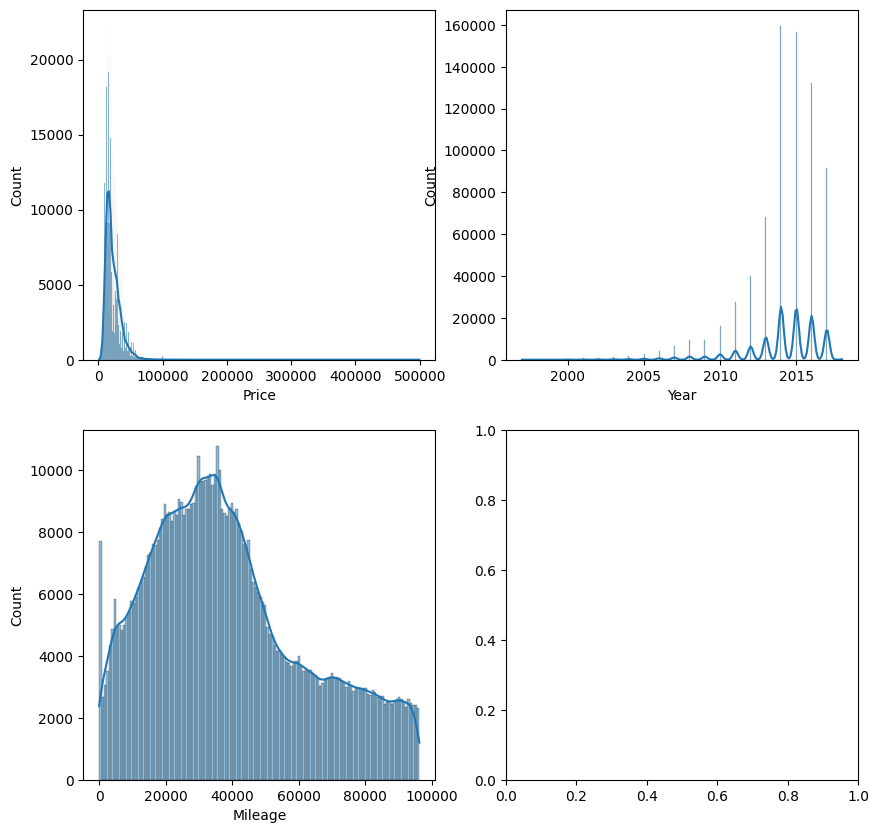

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fitur_numerik = ['Price', 'Year', 'Mileage']

fig, axs = plt.subplots(2,2, figsize=(10,10))

sns.histplot(x='Price', data=df2, kde=True, ax=axs[0,0] )
sns.histplot(x='Year', data=df2, kde=True, ax=axs[0,1] )
sns.histplot(x='Mileage', data=df2, kde=True, ax=axs[1,0] )

In [8]:
df2.select_dtypes(exclude='number').columns.to_list()

['City', 'State', 'Make', 'Model']

In [9]:
tar_enc = ['City', 'State', 'Make', 'Model']
for i in tar_enc:
    mean_encoded = df2.groupby(i)['Price'].mean()
    df2[i] = df2[i].map(mean_encoded)

C:\Users\aryag\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
df2.head()

,Price,Year,Mileage,City,State,Make,Model
0,8995,2014,35725,23082.674436,25513.912678,26446.853061,16240.052632
1,10888,2013,19606,22071.715420,23269.430777,26446.853061,17274.157975
2,8995,2013,48851,23082.674436,25513.912678,26446.853061,16240.052632
3,10999,2014,39922,22258.891304,24157.598195,26446.853061,17274.157975
4,14799,2016,22142,21309.544776,23802.412737,26446.853061,22464.898396


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731142 entries, 0 to 852121
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Price    731142 non-null  int64  
 1   Year     731142 non-null  int64  
 2   Mileage  731142 non-null  int64  
 3   City     731142 non-null  float64
 4   State    731142 non-null  float64
 5   Make     731142 non-null  float64
 6   Model    731142 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 60.8 MB


In [12]:
x = df2.drop(columns=['Price'])
y = df2['Price']

In [13]:
df_nscal = x.copy()
df_mm = x.copy()
df_ss = x.copy()
df_rb = x.copy()

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [15]:
x.select_dtypes(include='number').columns.tolist()

['Year', 'Mileage', 'City', 'State', 'Make', 'Model']

In [16]:
mm = MinMaxScaler()
ss = StandardScaler()
rb = RobustScaler()
numeric_cols = ['Year', 'Mileage', 'City', 'State', 'Make', 'Model']
cat_cols = [col for col in df2.columns if col not in numeric_cols]
df_mm = pd.DataFrame(mm.fit_transform(x), columns=x.columns)
df_ss = pd.DataFrame(ss.fit_transform(x[numeric_cols]), columns=numeric_cols)
df_ss = pd.concat([df_ss, df2[cat_cols].reset_index(drop=True)], axis=1)
df_ss = df_ss.drop(columns=['Price'])
df_rb = pd.DataFrame(rb.fit_transform(x[numeric_cols]), columns=numeric_cols)
df_rb = pd.concat([df_rb, df2[cat_cols].reset_index(drop=True)], axis=1)
df_rb = df_rb.drop(columns=['Price'])

In [17]:
df_mm.describe()

,Year,Mileage,City,State,Make,Model
count,731142.000000,731142.000000,731142.000000,731142.000000,731142.000000,731142.000000
mean,0.817500,0.408078,0.077714,0.576242,0.083314,0.048426
std,0.118071,0.246432,0.017960,0.097100,0.038445,0.027760
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.761905,0.220920,0.068130,0.506377,0.062169,0.031213
50%,0.857143,0.368374,0.075611,0.573542,0.083008,0.042339
75%,0.904762,0.559228,0.085317,0.604458,0.086738,0.061273
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df_ss.describe()

,Year,Mileage,City,State,Make,Model
count,7.311420e+05,7.311420e+05,7.311420e+05,7.311420e+05,7.311420e+05,7.311420e+05
mean,2.982650e-14,1.321683e-16,1.226522e-15,-1.196901e-15,-1.061078e-15,-1.495834e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-6.923793e+00,-1.655949e+00,-4.327146e+00,-5.934549e+00,-2.167125e+00,-1.744454e+00
25%,-4.708585e-01,-7.594720e-01,-5.336021e-01,-7.195210e-01,-5.500228e-01,-6.200605e-01
50%,3.357583e-01,-1.611192e-01,-1.170639e-01,-2.781490e-02,-7.968149e-03,-2.192613e-01
75%,7.390666e-01,6.133536e-01,4.233396e-01,2.905887e-01,8.905764e-02,4.627927e-01
max,1.545683e+00,2.401969e+00,5.135354e+01,4.364154e+00,2.384425e+01,3.427857e+01


In [19]:
df_rb.describe()

,Year,Mileage,City,State,Make,Model
count,731142.000000,731142.000000,731142.000000,731142.000000,731142.000000,731142.000000
mean,-0.277503,0.117363,0.122331,0.027537,0.012468,0.202485
std,0.826498,0.728425,1.044996,0.989992,1.564749,0.923487
min,-6.000000,-1.088870,-4.399518,-5.847616,-3.378536,-1.408494
25%,-0.666667,-0.435855,-0.435281,-0.684783,-0.848179,-0.370133
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.333333,0.564145,0.564719,0.315217,0.151821,0.629867
max,1.000000,1.867016,53.786564,4.348012,37.322715,31.858273


In [20]:
df_nscal.shape

(731142, 6)

In [21]:
df_mm.shape

(731142, 6)

In [22]:
df_ss.shape

(731142, 6)

In [23]:
df_rb.shape

(731142, 6)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score

In [25]:
df_nscal['Price'] = df2['Price'].values
df_mm['Price'] = df2['Price'].values
df_ss['Price'] = df2['Price'].values
df_rb['Price'] = df2['Price'].values

sampled_df_nscal = df_nscal.sample(frac=0.1, random_state=42)
sampled_df_mm = df_mm.sample(frac=0.1, random_state=42)
sampled_df_ss = df_ss.sample(frac=0.1, random_state=42)
sampled_df_rb = df_rb.sample(frac=0.1, random_state=42)

X_nscal = sampled_df_nscal.drop('Price', axis=1)
y_nscal = sampled_df_nscal['Price']

X_mm = sampled_df_mm.drop('Price', axis=1)
y_mm = sampled_df_mm['Price']

X_ss = sampled_df_ss.drop('Price', axis=1)
y_ss = sampled_df_ss['Price']

X_rb = sampled_df_rb.drop('Price', axis=1)
y_rb = sampled_df_rb['Price']

In [ ]:
models = {
    "Regresi": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "SVM": SVR(),
    "RF": RandomForestRegressor(),
    "Cat": CatBoostRegressor(verbose=0, task_type="GPU")
}

model_scores_ns = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X=X_nscal, y=y_nscal, cv=25, scoring='neg_mean_squared_error')
    model_scores_ns[name] = cv_scores.tolist()  
    print(f"{name} = {cv_scores}")

print("\nHasil Skor Lengkap Semua Model:")
for model, scores in model_scores_ns.items():
    print(f"{model}: {scores}")

In [ ]:
df_scores = abs(pd.DataFrame.from_dict(model_scores_ns , orient='index').transpose())
df_scores.to_csv('3model_scores_ns.csv', index=False)

In [ ]:
models = {
    "Regresi": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "SVM": SVR(),
    "RF": RandomForestRegressor(),
    "Cat": CatBoostRegressor(verbose=0, task_type="GPU")
}

model_scores_mm = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X=X_mm, y=y_mm, cv=25, scoring='neg_mean_squared_error')
    model_scores_mm[name] = cv_scores.tolist()  
    print(f"{name} = {cv_scores}")

print("\nHasil Skor Lengkap Semua Model:")
for model, scores in model_scores_mm.items():
    print(f"{model}: {scores}")

In [ ]:
df_scores2 = abs(pd.DataFrame.from_dict(model_scores_mm , orient='index').transpose())
df_scores2.to_csv('3model_scores_mm.csv', index=False)

In [ ]:
models = {
    "Regresi": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "SVM": SVR(),
    "RF": RandomForestRegressor(),
    "Cat": CatBoostRegressor(verbose=0, task_type="GPU")
}

model_scores_ss = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X=X_ss, y=y_ss, cv=25, scoring='neg_mean_squared_error')
    model_scores_ss[name] = cv_scores.tolist()  
    print(f"{name} = {cv_scores}")

print("\nHasil Skor Lengkap Semua Model:")
for model, scores in model_scores_ss.items():
    print(f"{model}: {scores}")

In [ ]:
df_scores3 = abs(pd.DataFrame.from_dict(model_scores_ss , orient='index').transpose())
df_scores3.to_csv('3model_scores_ss.csv', index=False)

In [32]:
models = {
    "Regresi": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "SVM": SVR(),
    "RF": RandomForestRegressor(),
    "Cat": CatBoostRegressor(verbose=0, task_type="GPU")
}

model_scores_rb = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X=X_rb, y=y_rb, cv=25, scoring='neg_mean_squared_error')
    model_scores_rb[name] = cv_scores.tolist()  
    print(f"{name} = {cv_scores}")

print("\nHasil Skor Lengkap Semua Model:")
for model, scores in model_scores_rb.items():
    print(f"{model}: {scores}")

Regresi = [-25186929.14039333 -35680227.39243282 -26795039.00309014
 -27914882.88600963 -30642735.4395249  -42051711.1954631
 -27780501.16094228 -36610439.81990901 -26295278.45045307
 -24565337.63367096 -28212458.53934554 -26972251.59543925
 -25660363.01143109 -28060715.99203128 -24593031.01645242
 -21857352.37587599 -26962136.42534097 -40296323.63823989
 -46361821.63135547 -24647174.1796295  -80739539.46324863
 -33344216.95166028 -31050908.97463213 -30125399.16492126
 -31929930.93829691]
KNN = [-26929649.43369573 -36966816.03351795 -27242068.15138461
 -25179802.09516581 -28134228.13837949 -41090082.97894017
 -29842814.35257436 -64326069.52842394 -23336639.42257778
 -24369301.28224273 -26810237.84802735 -23186750.43716923
 -28902874.9501812  -29070914.38030769 -23295938.36177839
 -22093676.12161423 -25008545.82738714 -35948657.54410397
 -44120578.58120383 -24546563.35458276 -77594255.64069767
 -27629297.13290014 -26522477.18502052 -26750541.00218878
 -38523257.65716826]
SVM = [-1.29618

In [33]:
df_scores4 = abs(pd.DataFrame.from_dict(model_scores_rb , orient='index').transpose())
df_scores4.to_csv('3model_scores_rb.csv', index=False)